# Regular Expressions

Regular expressions are a powerful way of building patterns to match text. 
- Using regular expressions, complex operations with string data can be written a lot quicker, which will save you time.
- Regular expressions are often faster to execute than their manual equivalents.
- Regular expressions are supported in almost every modern programming language, as well as other places like command line utilities and databases. Understanding regular expressions gives us a powerful tool that you can use wherever you work with data.

In [1]:
import pandas as pd
hn = pd.read_csv('hacker_news.csv')
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


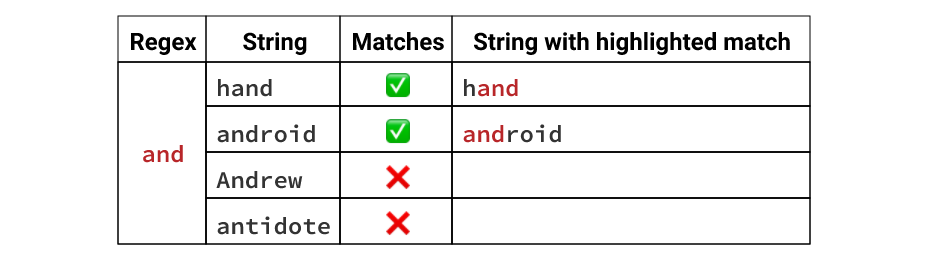

Python has a built in module for regular expressions, the <code>re</code> module. One of its useful function is <code>re.search()</code> function which takes in two arguments :
- the regex pattern
- the string in which we want that pattern



In [2]:
import re
m = re.search("and", "hand")
m

<re.Match object; span=(1, 4), match='and'>

The function returns a [<code>Match</code>](https://docs.python.org/3/library/re.html#match-objects) object when there is a match and returns None when the pattern is not matched. Also, boolean value of a match object is True while None is False.

In [3]:
string_list = ["Julie's favorite color is Blue.",
               "Keli's favorite color is Green.",
               "Craig's favorite colors are blue and red."]

pattern = "Blue"

for s in string_list:
    if re.search(pattern, s):
        print("Match")
    else:
        print("No Match")

Match
No Match
No Match


Now, these are simple operations that we could even perform with <strong>in</strong>. The usefulness of regular expressions comes in when we use charcater sequences. he first of these we'll learn is called a set. A set allows us to specify two or more characters that can match in a single character's position.

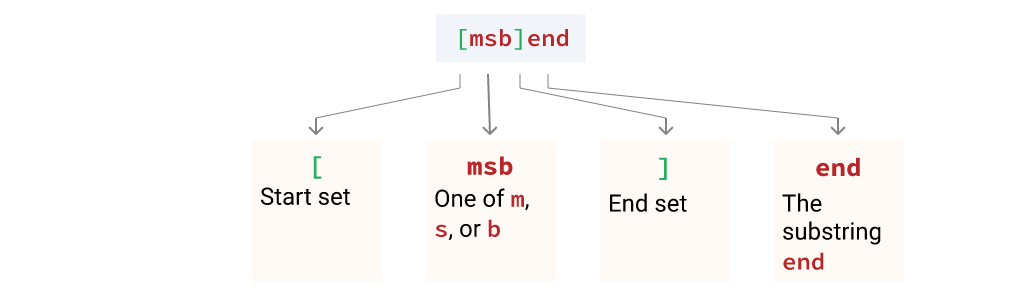

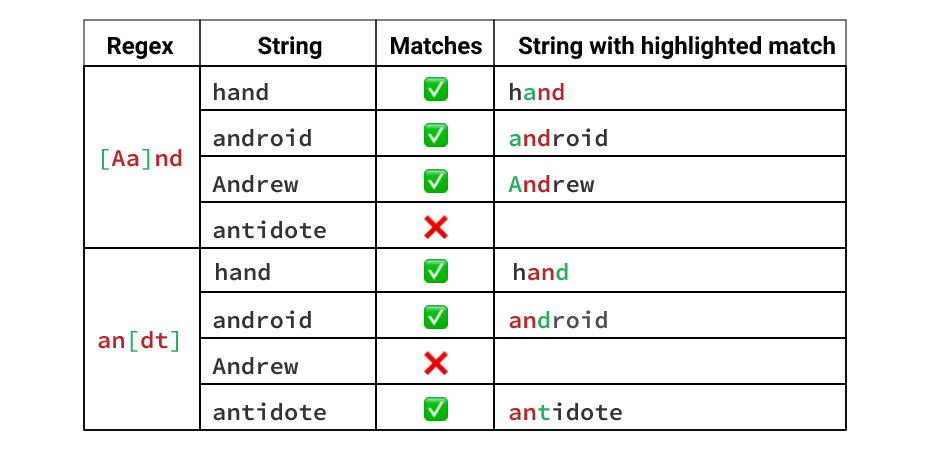

Now using the same list in the cell above, we can test by setting the pattern to a set.

In [4]:
pattern = '[bB]lue'
for s in string_list:
    if re.search(pattern, s):
        print("Match")
    else:
        print("No Match")

Match
No Match
Match


Now we are going to check how many times is python present in the <code>title</code> column in our dataset.

In [5]:
pattern = '[Pp]ython'
python_titles = []
for i in hn['title']:
    if re.search(pattern,i):
        python_titles.append(i)
len(python_titles)

160

Since we are using pandas, we should try to use more vectorised operations. We will use [Series.str.contains() method](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) to check whether a Series of strings match a particular regex pattern. 

In [6]:
# boolean values are returned
pd.Series(string_list).str.contains('[Bb]lue')

0     True
1    False
2     True
dtype: bool

We can use the Series.sum() method to sum all the values in the boolean mask, with each True value counting as 1, and each False as 0. This means that we can easily count the number of values in the original series that matched our pattern.

In [7]:
pattern_bool = pd.Series(string_list).str.contains('[Bb]lue')
pattern_bool.sum()

2

In [8]:
# for python in title
python_titles = hn['title'].str.contains('[Pp]ython').sum()
python_titles

160

In [9]:
# to select rows containing python in title
hn[hn['title'].str.contains('[Pp]ython')]

,id,title,url,num_points,num_comments,author,created_at
102,10974870,From Python to Lua: Why We Switched,https://www.distelli.com/blog/using-lua-for-ou...,243,188,chase202,1/26/2016 18:17
103,11244541,Ubuntu 16.04 LTS to Ship Without Python 2,http://news.softpedia.com/news/ubuntu-16-04-lt...,2,1,_snydly,3/8/2016 10:39
144,10963528,Create a GUI Application Using Qt and Python i...,http://digitalpeer.com/s/c63e,21,1,zoodle,1/24/2016 19:01
196,10716331,How I Solved GCHQ's Xmas Card with Python and ...,http://matthewearl.github.io/2015/12/10/gchq-x...,6,1,kipi,12/11/2015 10:38
436,11895088,"Unikernel Power Comes to Java, Node.js, Go, an...",http://www.infoworld.com/article/3082051/open-...,3,1,syslandscape,6/13/2016 16:23
...,...,...,...,...,...,...,...
19597,12061177,David Beazley Python Concurrency from the Gro...,https://www.youtube.com/watch?v=MCs5OvhV9S4,2,1,bakery2k,7/9/2016 13:05
19852,10988468,Ask HN: How to automate Python apps deployment?,NaN,4,18,aalhour,1/28/2016 14:55
19862,11738470,Moving Away from Python 2,https://asmeurer.github.io/blog/posts/moving-a...,227,275,ngoldbaum,5/20/2016 15:14
19980,12524656,Python vs. Julia Observations,https://medium.com/@Jernfrost/python-vs-julia-...,2,1,blacksmythe,9/18/2016 9:54


In [10]:
# for ruby in title
ruby_titles = hn['title'].str.contains('[Rr]uby').sum()
ruby_titles

48

If we want to specify that a charcater repeats, we can use '{}'.
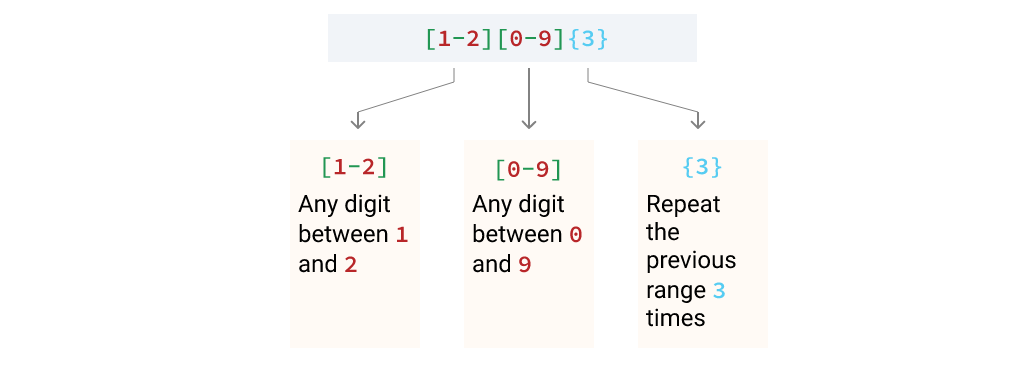
The name for this type of regular expression syntax is called a quantifier. Quantifiers specify how many of the previous character our pattern requires, which can help us when we want to match substrings of specific lengths.
Different types of 'numeric quanitfiers'
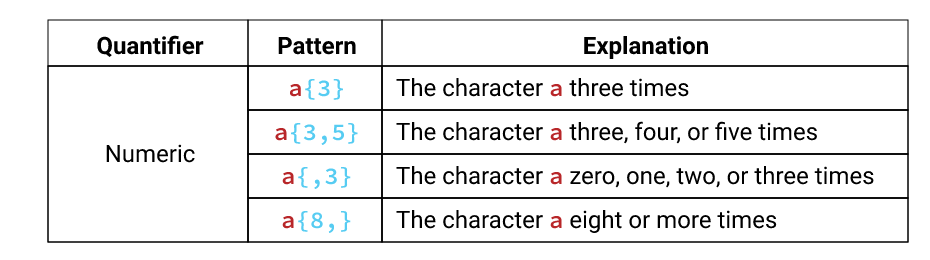

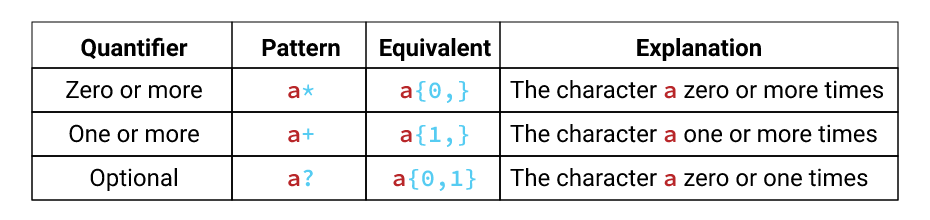

Suppose if we want to look for the titles which contain e-mail or email, we will need to use <code>?</code>, the optional quantifier, to include '-' as an option in our pattern.

In [11]:
pattern = 'e-?mail'
email_bool = hn['title'].str.contains(pattern)
email_count = email_bool.sum()
email_titles = hn['title'][email_bool]
email_titles

119      Show HN: Send an email from your shell to your...
313          Disposable emails for safe spam free shopping
1361     Ask HN: Doing cold emails? helps us prove this...
1750     Protect yourself from spam, bots and phishing ...
2421                    Ashley Madison hack treating email
                               ...                        
18098    House panel looking into Reddit post about Cli...
18583    Mailgen  Generates clean, responsive HTML for ...
18847    Show HN: Crisp iOS keyboard for email and text...
19303    Ask HN: Why big email providers don't sign the...
19446    Tell HN: Secure email provider Riseup will run...
Name: title, Length: 86, dtype: object

In [12]:
titles = hn['title']

Some titles contain tag such as <code>[pdf],[video]</code>, for example:

[video] Google Self-Driving SUV Sideswipes Bus
New Directions in Cryptography by Diffie and Hellman (1976) [pdf]
Wallace and Gromit  The Great Train Chase (1993) [video]

So our next task is to filter out the titles which contain the tags. Since our expressions are enclosed in squared brackets, on entering <code>[pdf]</code>, the function would search for 'pdf' rather than '[pdf]'. To escape both the open and closed brackets we can add a backslash '\' before each one of them.
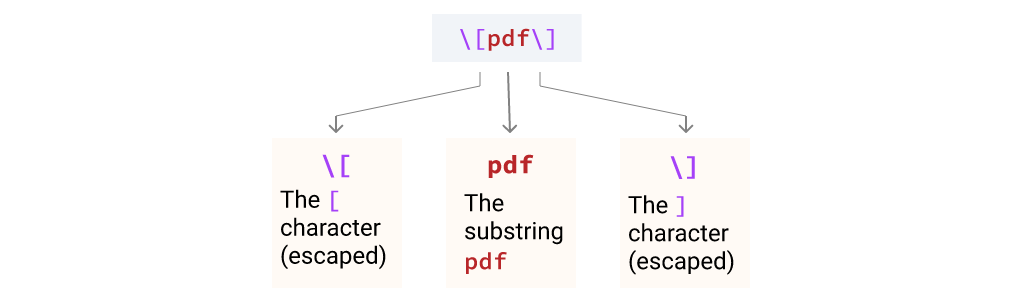

One more challenge we have to solve is to make the pattern recognise unknown characters, like pdf or video. We will use character classes.

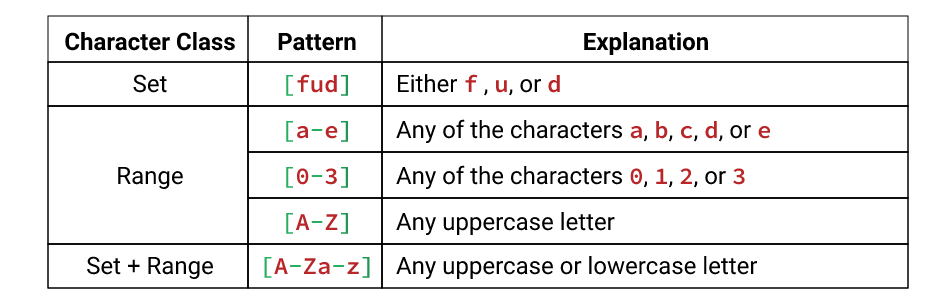

Two points to observe:
- Ranges can be used for letters as well as numbers.
- Sets and ranges can be combined.

These are some common character classes that we will be using.
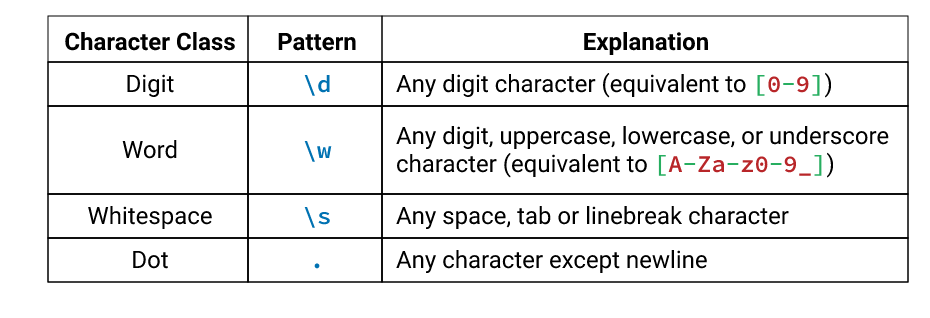

The one that we'll be using to match characters in tags is <code>\w</code>, which represents any number or letter. Each character class represents a single character, so to match multiple characters (e.g. words like video and pdf), we'll need to combine them with quantifiers.

In order to match word characters between our brackets, we can combine the word character class (\w) with the 'one or more' quantifier (+), giving us a combined pattern of <code style="color:blue">\w+</code>.

Also, these will only match tags without speacial characters. To match other tags we can use <code>.+</code> 

CELL RECAP:

- We can use a backslash to escape characters that have special meaning in regular expressions (e.g. \[ will match an open bracket character).

- Character classes let us match certain groups of characters (e.g. \w will match any word character).
- Character classes can be combined with quantifiers when we want to match different numbers of characters.

In [13]:
pattern = '\[\w+\]'
tag_titles = titles.str.contains(pattern)
tag_titles.sum()

444

Backslashes are used to escape many other characters in regular expressions, as well as to denote some special character sequences (like character classes).
Generally in Python, backslashes are used for escape sequences. Escape sequence is a sequence of characters that does not represent itself when used inside a character or string literal, but is translated into another character or a sequence of characters that may be difficult or impossible to represent directly. For exmaple, <code>\n</code>, is used to represent a new line. Now, while using regular expressions there can be some conflict. We have two methods to solve this:


1. add an extra backslash

In [14]:
print('hello\b world')

# this will not activate the escape sequence
print('hello\\b world')

hello world
hello\b world


2. use [raw strings](https://docs.python.org/3/reference/lexical_analysis.html#string-and-bytes-literals), which we denote by prefixing our string with the r character. 

In [15]:
print(r'hello\b world')

hello\b world


Until now, we have only determined whether a particular string contains our pattern or not usinn Boolean datatype. Next, we will use [Series.str.extract() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html) to extract the actual data we were finding. In order to do this, we'll need to use capture groups. Capture groups allow us to specify one or more groups within our match that we can access separately. For now, we will only create a single capture group for our regular expression. We specify capture groups using parentheses. 

For context:

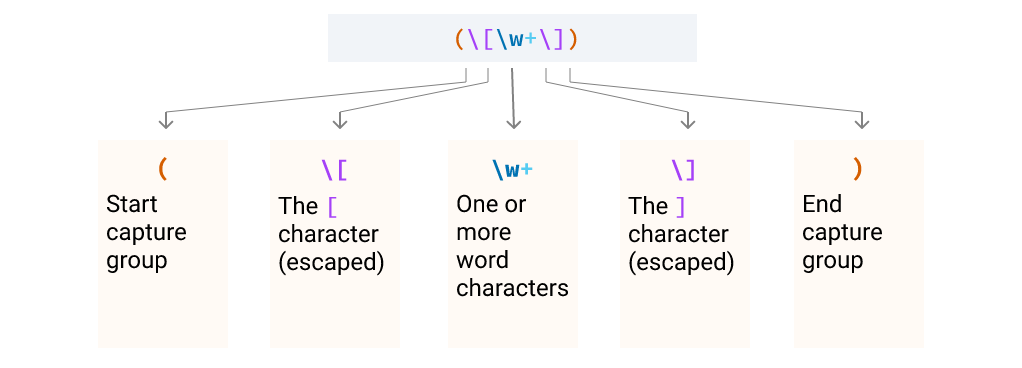



In [16]:
pattern = r"(\[\w+\])"
tag_titles_text = titles.str.extract(pattern)

# the column '0' is the default column name
# we can apply the parenthesis just around \w+, to get only the text
tag_titles_text.dropna()

,0
66,[pdf]
100,[German]
159,[pdf]
162,[pdf]
195,[Beta]
...,...
19763,[pdf]
19867,[video]
19947,[pdf]
19979,[pdf]


In [17]:
type(tag_titles_text)

pandas.core.frame.DataFrame

In [18]:
# using expand = False, we get a Series
tag_titles_text = titles.str.extract(pattern, expand = False)
type(tag_titles_text)

pandas.core.series.Series

In [19]:
pattern = r"\[(\w+)\]"
tag_titles_freq = titles.str.extract(pattern, expand = False).value_counts()
tag_titles_freq

pdf            276
video          111
2015             3
audio            3
2014             2
slides           2
beta             2
NSFW             1
German           1
Challenge        1
comic            1
1996             1
ask              1
png              1
song             1
transcript       1
much             1
Benchmark        1
Petition         1
USA              1
Infograph        1
Skinnywhale      1
coffee           1
SpaceX           1
viz              1
ANNOUNCE         1
2008             1
Map              1
Excerpt          1
GOST             1
React            1
Beta             1
Python           1
satire           1
crash            1
updated          1
HBR              1
Live             1
detainee         1
gif              1
JavaScript       1
map              1
survey           1
blank            1
Videos           1
SPA              1
videos           1
CSS              1
repost           1
Ubuntu           1
5                1
Australian       1
Name: title,

While using regular expressions, we can come across some bad instances that have been included due to our pattern. Since we need to exclude them, we mostly iterate to find those.

We will create a function that returns our first ten matches, for us to exclude unwanted instances.

In [20]:
def first_10_matches(pattern):
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

In [21]:
# similar to python_titles
first_10_matches(r"[Jj]ava")

267      Show HN: Hire JavaScript - Top JavaScript Talent
436     Unikernel Power Comes to Java, Node.js, Go, an...
580     Python integration for the Duktape Javascript ...
811     Ask HN: Are there any projects or compilers wh...
1023                         Pippo  Web framework in Java
1046    If you write JavaScript tools or libraries, bu...
1093    Rollup.js: A next-generation JavaScript module...
1162                 V8 JavaScript Engine: V8 Release 5.4
1195                   Proposed JavaScript Standard Style
1314           Show HN: Design by Contract for JavaScript
Name: title, dtype: object

We can see that there are a number of matches that contain Java as part of the word JavaScript. We want to exclude these titles from matching so we get an accurate count. One way to do this is by using negative character classes. Negative character classes are character classes that match every character except a character class.

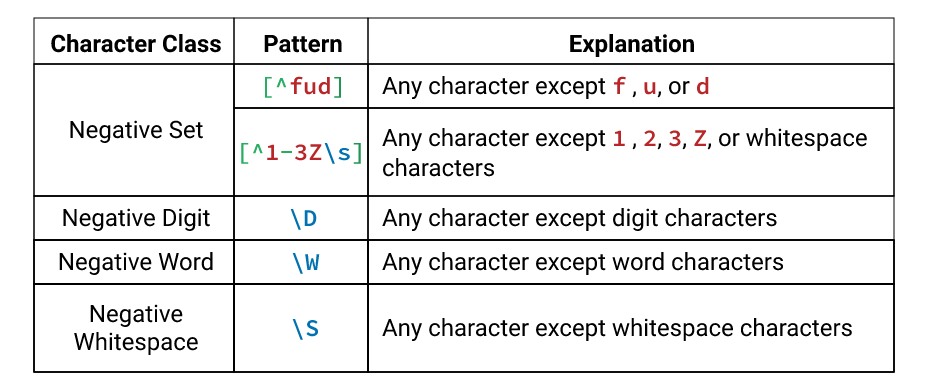

In [22]:
# pattern is defined in accordance with the table above. We exclude any occurence of 's' in our title
pattern = r"[Jj]ava[^Ss]"
java_titles = titles[titles.str.contains(pattern)]
java_titles.head()

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1840                    Adopting RxJava on the Airbnb App
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
Name: title, dtype: object

While the negative set was effective in removing any bad matches that mention JavaScript, it also had the side-effect of removing any titles where Java occurs at the end of the string.
This is because the negative set [^Ss] must match one character. Instances at the end of a string aren't followed by any characters, so there is no match.

A different approach to take in cases like these is to use the word boundary anchor, specified using the syntax \b. A word boundary matches the position between a word character and a non-word character, or a word character and the start/end of a string.




In [23]:
# note that if we have a full stop at the end of the title, we will have get a Match object. The example below does
# not have full stop.
print(re.search(pattern,'Sometimes people confuse JavaScript with Java'))

None


The regular expression returns None, because there is no substring that contains Java followed by a character that isn't S.

In [24]:
print(re.search(r'[Jj]ava','Sometimes people confuse JavaScript with Java'))
re.findall(r'[Jj]ava','Sometimes people confuse JavaScript with Java')

<re.Match object; span=(25, 29), match='Java'>


['Java', 'Java']

In [25]:
pattern_2 = r"\bJava\b"

# check the span in th output object
print(re.search(pattern_2, "Sometimes people  Java confuse JavaScript with Java"))
re.findall(pattern_2,'Sometimes people  Java confuse JavaScript with Java')

<re.Match object; span=(18, 22), match='Java'>


['Java', 'Java']

In [26]:
re.findall(r'[Jj]ava','Sometimes people  Java confuse JavaScript with Java')

['Java', 'Java', 'Java']

In [27]:
pattern = r'\b[Jj]ava\b'
java_titles = titles[titles.str.contains(pattern)]
java_titles

436      Unikernel Power Comes to Java, Node.js, Go, an...
811      Ask HN: Are there any projects or compilers wh...
1023                          Pippo  Web framework in Java
1972           Node.js vs. Java: Which Is Faster for APIs?
2093                     Java EE and Microservices in 2016
2367     Code that is valid in both PHP and Java, and p...
2493     Ask HN: I've been a java dev for a couple of y...
2751                 Eventsourcing for Java 0.4.0 released
3228                               Comparing Rust and Java
3452     What are the Differences Between Java Platform...
3627                     Friends don't let friends do Java
4273      Ask HN: Is Bloch's Effective Java Still Current?
4624     Oracle Discloses Critical Java Vulnerability i...
5461                        Lambdas (in Java 8) Screencast
5847     IntelliJ IDEA and the whole IntelliJ platform ...
6268             Oracle deprecating Java applets in Java 9
7436     Forget Guava: 5 Google Libraries Java Develope.

Now that we have had some glimpse of word boundary anchor, now we will check out <strong>beginning anchor</strong>     and <strong>end anchor</strong>

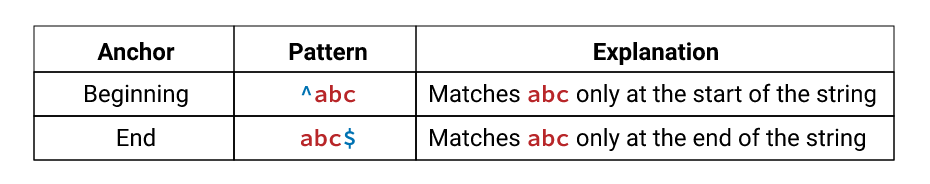

Note that the ^ character is used both as a beginning anchor and to indicate a negative set, depending on whether the character preceding it is a <code>[</code> or not.

In [28]:
test_cases = pd.Series([
    "Red Nose Day is a well-known fundraising event",
    "My favorite color is Red",
    "My Red Car was purchased three years ago"
])
test_cases.str.contains(r"^[Rr]ed")

0     True
1    False
2    False
dtype: bool

In [29]:
# using these anchors to determine tags at the start and the end
titles.str.contains(r'^(\[\w+\])').sum()

/Users/saumyamundra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


15

In [30]:
titles.str.contains(r'(\[\w+\])$').sum()

417

Until now we have using <code>[Jj]</code> to check for capitalisation. This works well for when we only have to check for a single character

In [31]:
email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL', 'emails', 'Emails',
              'E-Mails'])

We can use flags to specify that our regular expression should ignore case. Both re.search() and the pandas regular expression methods accept an optional flags argument. This argument accepts one or more flags, which are special variables in the re module that modify the behavior of the regex interpreter.

The most common and useful one is the <code>re.IGNORECASE</code> flag, which for convenience can be used as <code>re.I</code>.



In [32]:
email_tests.str.contains(r'email')

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
dtype: bool

In [33]:
email_tests.str.contains(r'email', flags = re.I)

0      True
1      True
2     False
3     False
4     False
5     False
6      True
7     False
8      True
9      True
10     True
11    False
dtype: bool

In [34]:
def email_count(val):
    return len(re.findall(r'email',val, flags = re.I))
    
email_titles = titles[titles.str.contains(r'email', flags = re.I)]
email_titles

119      Show HN: Send an email from your shell to your...
161      Computer Specialist Who Deleted Clinton Emails...
174                                        Email Apps Suck
261      Emails Show Unqualified Clinton Foundation Don...
313          Disposable emails for safe spam free shopping
                               ...                        
18847    Show HN: Crisp iOS keyboard for email and text...
19303    Ask HN: Why big email providers don't sign the...
19395    I used HTML Email when applying for jobs, here...
19446    Tell HN: Secure email provider Riseup will run...
19905    Gmail Will Soon Warn Users When Emails Arrive ...
Name: title, Length: 136, dtype: object

In [35]:
count = email_titles.apply(email_count)
count.sum()

146

In [43]:
titles.str.contains(r'email', flags = re.I).sum()

136

In [44]:
titles.str.contains(r"\be[\-\s]?mails?\b", flags = re.I).sum()

141